## Project Alpaca 

Anargha Ajoykumar, Cathy Ouyang

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import scipy.optimize as optimize
#!pip3 install alpaca-trade-api

### Trading strategies and Backtesting for AAPL ###

In [2]:
#Step 1: Connecting to Alpaca 
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame

api_key = 'PKXTC19ELFLH7AMSTHBB'
api_secret = 'Zpb9uRDU5d26OZQfA2r29FRNlLeVTCB9TkVo7LpY'
base_url = 'https://paper-api.alpaca.markets'

# Initialize Alpaca API
api = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')

# Get historical market data
symbol = 'AAPL' 
timeframe = TimeFrame.Day
historical_data = api.get_bars(symbol, timeframe, "2020-01-01", "2022-01-01").df
print(historical_data)

                            close      high      low  trade_count     open  \
timestamp                                                                    
2020-01-02 05:00:00+00:00  300.35  300.6000  295.190       283489  296.240   
2020-01-03 05:00:00+00:00  297.43  300.5800  296.500       280441  297.150   
2020-01-06 05:00:00+00:00  299.80  299.9600  292.750       242868  293.790   
2020-01-07 05:00:00+00:00  298.39  300.9000  297.480       227871  299.840   
2020-01-08 05:00:00+00:00  303.19  304.4399  297.156       261773  297.160   
...                           ...       ...      ...          ...      ...   
2021-12-27 05:00:00+00:00  180.33  180.4200  177.070       630113  177.085   
2021-12-28 05:00:00+00:00  179.29  181.3300  178.530       631773  180.160   
2021-12-29 05:00:00+00:00  179.38  180.6300  178.140       491795  179.330   
2021-12-30 05:00:00+00:00  178.20  180.5700  178.090       498666  179.470   
2021-12-31 05:00:00+00:00  177.57  179.2300  177.260       45076

In [3]:
#obtain account info
account = api.get_account()
print(account)

Account({   'account_blocked': False,
    'account_number': 'PA3DUQFGIAIG',
    'accrued_fees': '0',
    'admin_configurations': {},
    'balance_asof': '2024-10-14',
    'bod_dtbp': '0',
    'buying_power': '78459.26',
    'cash': '-67040.39',
    'created_at': '2024-05-03T23:30:01.861042Z',
    'crypto_status': 'ACTIVE',
    'crypto_tier': 1,
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '0',
    'effective_buying_power': '78459.26',
    'equity': '145499.65',
    'id': '03d86d11-874e-49ed-aed0-18d018a71fb6',
    'initial_margin': '106270.02',
    'intraday_adjustments': '0',
    'last_equity': '143247.73',
    'last_maintenance_margin': '104442.88',
    'long_market_value': '212540.04',
    'maintenance_margin': '63762.01',
    'multiplier': '2',
    'non_marginable_buying_power': '37229.63',
    'options_approved_level': 2,
    'options_buying_power': '81737.63',
    'options_trading_level': 2,
    'pattern_day_trader': False,
    'pending_reg_taf_f

In [4]:
#Step 2 - Storing data in csv
csv_name = "historical_data.csv"
historical_data.to_csv(csv_name, index=False)
print("CSV has been generated.")

CSV has been generated.


In [5]:
#Different metrics that we can use - Moving averages, relative stength index, macd  

#### Trading Strategy with Moving Average ####

                            close      high      low  trade_count     open  \
timestamp                                                                    
2020-01-02 05:00:00+00:00  300.35  300.6000  295.190       283489  296.240   
2020-01-03 05:00:00+00:00  297.43  300.5800  296.500       280441  297.150   
2020-01-06 05:00:00+00:00  299.80  299.9600  292.750       242868  293.790   
2020-01-07 05:00:00+00:00  298.39  300.9000  297.480       227871  299.840   
2020-01-08 05:00:00+00:00  303.19  304.4399  297.156       261773  297.160   
...                           ...       ...      ...          ...      ...   
2021-12-27 05:00:00+00:00  180.33  180.4200  177.070       630113  177.085   
2021-12-28 05:00:00+00:00  179.29  181.3300  178.530       631773  180.160   
2021-12-29 05:00:00+00:00  179.38  180.6300  178.140       491795  179.330   
2021-12-30 05:00:00+00:00  178.20  180.5700  178.090       498666  179.470   
2021-12-31 05:00:00+00:00  177.57  179.2300  177.260       45076

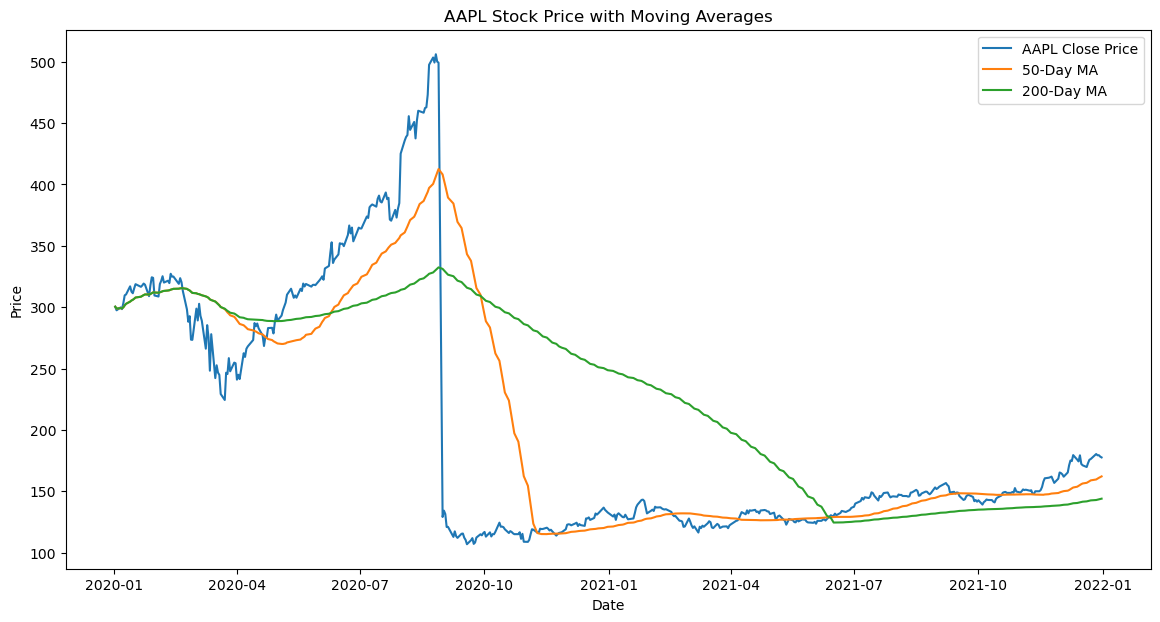

Portfolio Return: -58.56%


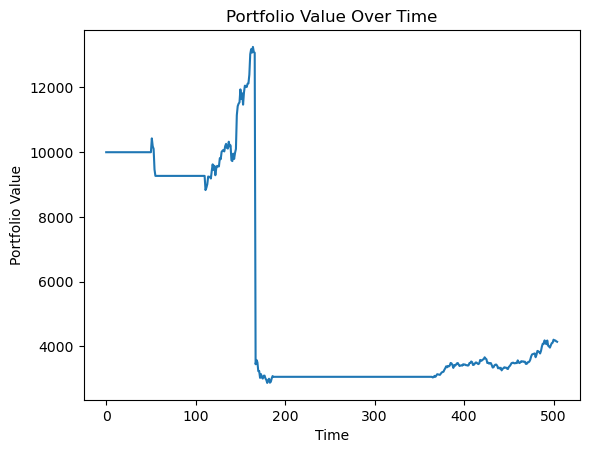

In [6]:
#Step 3 Creating model
#Example 1 trading strategy with simple moving average

def moving_average_strategy(data, short_window=50, long_window=200):
    #Calculate short and long moving averages
    data['short_mavg'] = data['close'].rolling(window=short_window, min_periods=1).mean()
    data['long_mavg'] = data['close'].rolling(window=long_window, min_periods=1).mean()
    
    #Generate signals
    data['signal'] = 0
    data.loc[data['short_mavg'] > data['long_mavg'], 'signal'] = 1  #Buy
    data.loc[data['short_mavg'] < data['long_mavg'], 'signal'] = -1  #Sell
    
    return data

#Usage
processed_data = moving_average_strategy(historical_data)
print(processed_data)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(processed_data['close'], label='AAPL Close Price')
plt.plot(processed_data['short_mavg'], label='50-Day MA')
plt.plot(processed_data['long_mavg'], label='200-Day MA')
plt.title('AAPL Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#Step 3: Backtesting
def backtest(data):
    
    # Initialize variables
    initial_cash = 10000  # Initial cash amount
    cash = initial_cash
    shares = 0  # Initial shares
    position_value = 0  # Initial position value
    total_value = 0  # Initial total portfolio value
    portfolio_value = []  # List to store portfolio value over time

    # Iterate through each row in the processed data
    for index, row in data.iterrows():
        # Calculate position value
        position_value = shares * row['close']

        # Update total portfolio value
        total_value = cash + position_value

        # Record portfolio value
        portfolio_value.append(total_value)

        # Buy signal: If signal is 1 (buy)
        if row['signal'] == 1:
            # Calculate the number of shares to buy (assuming full investment)
            shares_to_buy = cash // row['close']
            # Update cash and shares
            cash -= shares_to_buy * row['close']
            shares += shares_to_buy

        # Sell signal: If signal is -1 (sell)
        elif row['signal'] == -1:
            # Sell all shares
            cash += shares * row['close']
            shares = 0

    # Calculate final portfolio value
    final_portfolio_value = cash + shares * data.iloc[-1]['close']

    # Calculate portfolio return
    portfolio_return = (final_portfolio_value - initial_cash) / initial_cash * 100

    return portfolio_value, portfolio_return

# Perform backtesting
portfolio_value, portfolio_return = backtest(processed_data)

# Print portfolio return
print("Portfolio Return: {:.2f}%".format(portfolio_return))

# Plot portfolio value over time
import matplotlib.pyplot as plt

plt.plot(portfolio_value)
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

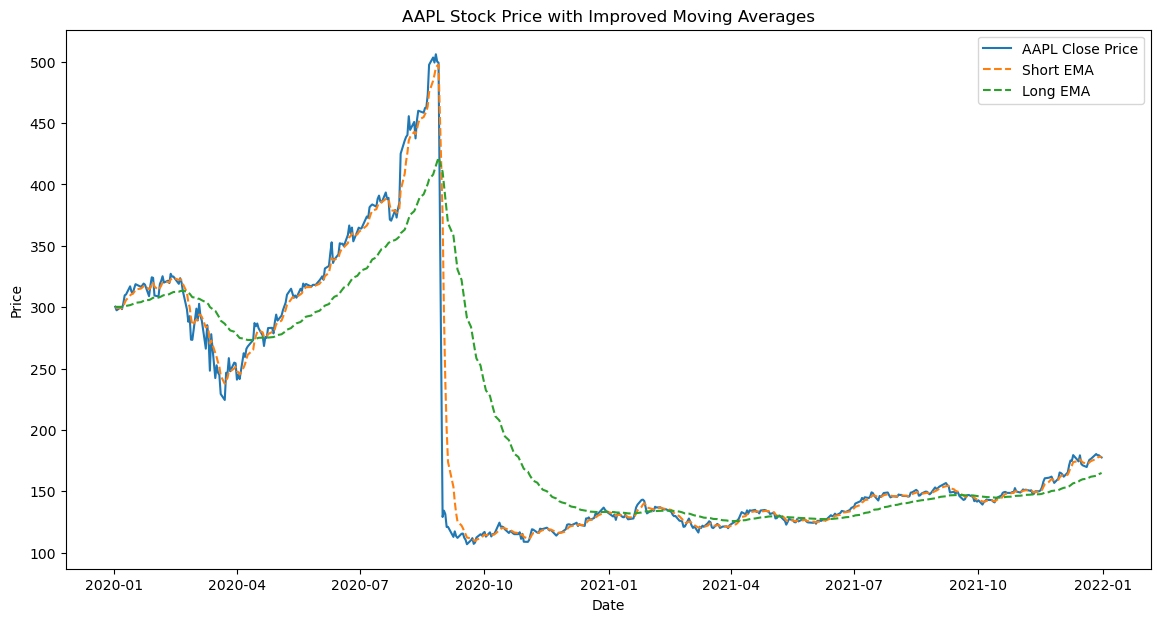

Portfolio Return: -66.06%


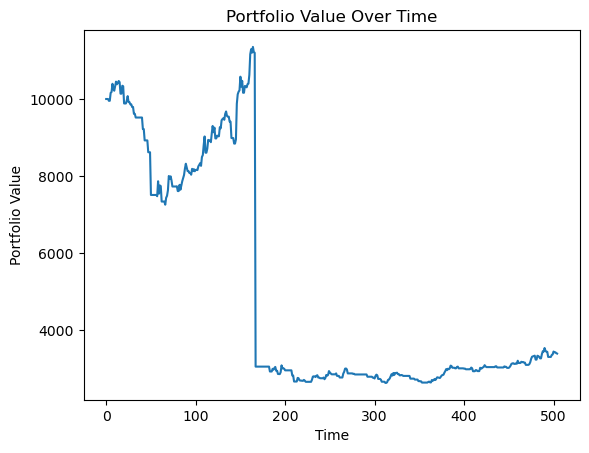

In [7]:
#Trying to improve the moving average results
def improved_moving_average_strategy(data, short_window=5, long_window=50):
    
    #Exponential moving averages
    data['short_ema'] = data['close'].ewm(span=short_window, adjust=False).mean()
    data['long_ema'] = data['close'].ewm(span=long_window, adjust=False).mean()
    
    data['signal'] = 0
    data.loc[data['close'] > data['short_ema'], 'signal'] = 1  # Buy when price is above short EMA
    data.loc[data['close'] < data['short_ema'], 'signal'] = -1  # Sell when price is below short EMA
    
    return data

processed_data = improved_moving_average_strategy(historical_data)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(processed_data['close'], label='AAPL Close Price')
plt.plot(processed_data['short_ema'], label='Short EMA', linestyle='--')
plt.plot(processed_data['long_ema'], label='Long EMA', linestyle='--')
plt.title('AAPL Stock Price with Improved Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#Step 3: Backtesting
def backtest(data):
    
    # Initialize variables
    initial_cash = 10000  # Initial cash amount
    cash = initial_cash
    shares = 0  # Initial shares
    position_value = 0  # Initial position value
    total_value = 0  # Initial total portfolio value
    portfolio_value = []  # List to store portfolio value over time

    # Iterate through each row in the processed data
    for index, row in data.iterrows():
        # Calculate position value
        position_value = shares * row['close']

        # Update total portfolio value
        total_value = cash + position_value

        # Record portfolio value
        portfolio_value.append(total_value)

        # Buy signal: If signal is 1 (buy)
        if row['signal'] == 1:
            # Calculate the number of shares to buy (assuming full investment)
            shares_to_buy = cash // row['close']
            # Update cash and shares
            cash -= shares_to_buy * row['close']
            shares += shares_to_buy

        # Sell signal: If signal is -1 (sell)
        elif row['signal'] == -1:
            # Sell all shares
            cash += shares * row['close']
            shares = 0

    # Calculate final portfolio value
    final_portfolio_value = cash + shares * data.iloc[-1]['close']

    # Calculate portfolio return
    portfolio_return = (final_portfolio_value - initial_cash) / initial_cash * 100

    return portfolio_value, portfolio_return

# Perform backtesting
portfolio_value, portfolio_return = backtest(processed_data)

# Print portfolio return
print("Portfolio Return: {:.2f}%".format(portfolio_return))

# Plot portfolio value over time
import matplotlib.pyplot as plt

plt.plot(portfolio_value)
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

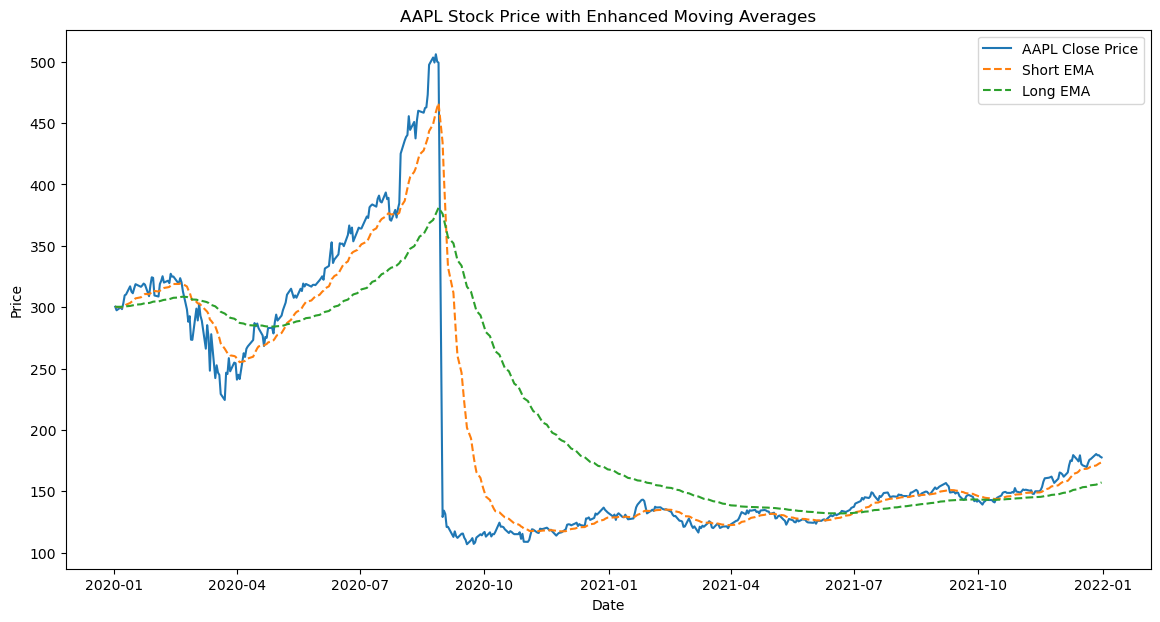

Portfolio Return: -51.95%


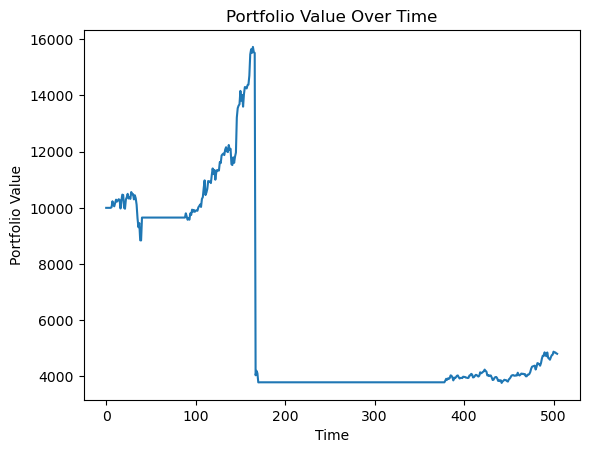

In [8]:
#Trying to improve the moving average again 

def enhanced_moving_average_strategy(data, short_window=20, long_window=100, stop_loss_pct=0.05):
    data['short_ema'] = data['close'].ewm(span=short_window, adjust=False).mean()
    data['long_ema'] = data['close'].ewm(span=long_window, adjust=False).mean()
    
    data['signal'] = 0
    data.loc[(data['close'] > data['short_ema']) & (data['short_ema'] > data['long_ema']), 'signal'] = 1  # Buy
    data.loc[(data['close'] < data['short_ema']) & (data['short_ema'] < data['long_ema']), 'signal'] = -1  # Sell
    
    #Trying stop-loss
    entry_price = 0
    for index, row in data.iterrows():
        if row['signal'] == 1:
            entry_price = row['close']
        elif row['signal'] == -1 and entry_price != 0:
            loss_pct = (entry_price - row['close']) / entry_price
            if loss_pct > stop_loss_pct:
                data.at[index, 'signal'] = 0  # Set signal to 0 (neutralize) if stop-loss condition is met
                entry_price = 0  # Reset entry price
    
    return data

processed_data = enhanced_moving_average_strategy(historical_data)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(processed_data['close'], label='AAPL Close Price')
plt.plot(processed_data['short_ema'], label='Short EMA', linestyle='--')
plt.plot(processed_data['long_ema'], label='Long EMA', linestyle='--')
plt.title('AAPL Stock Price with Enhanced Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#Step 3: Backtesting
def backtest(data):
    
    # Initialize variables
    initial_cash = 10000  # Initial cash amount
    cash = initial_cash
    shares = 0  # Initial shares
    position_value = 0  # Initial position value
    total_value = 0  # Initial total portfolio value
    portfolio_value = []  # List to store portfolio value over time

    # Iterate through each row in the processed data
    for index, row in data.iterrows():
        # Calculate position value
        position_value = shares * row['close']

        # Update total portfolio value
        total_value = cash + position_value

        # Record portfolio value
        portfolio_value.append(total_value)

        # Buy signal: If signal is 1 (buy)
        if row['signal'] == 1:
            # Calculate the number of shares to buy (assuming full investment)
            shares_to_buy = cash // row['close']
            # Update cash and shares
            cash -= shares_to_buy * row['close']
            shares += shares_to_buy

        # Sell signal: If signal is -1 (sell)
        elif row['signal'] == -1:
            # Sell all shares
            cash += shares * row['close']
            shares = 0

    # Calculate final portfolio value
    final_portfolio_value = cash + shares * data.iloc[-1]['close']

    # Calculate portfolio return
    portfolio_return = (final_portfolio_value - initial_cash) / initial_cash * 100

    return portfolio_value, portfolio_return

# Perform backtesting
portfolio_value, portfolio_return = backtest(processed_data)

# Print portfolio return
print("Portfolio Return: {:.2f}%".format(portfolio_return))

# Plot portfolio value over time
import matplotlib.pyplot as plt

plt.plot(portfolio_value)
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

#### Trading Strategy with RSI ####

                            close      high      low  trade_count     open  \
timestamp                                                                    
2020-01-02 05:00:00+00:00  300.35  300.6000  295.190       283489  296.240   
2020-01-03 05:00:00+00:00  297.43  300.5800  296.500       280441  297.150   
2020-01-06 05:00:00+00:00  299.80  299.9600  292.750       242868  293.790   
2020-01-07 05:00:00+00:00  298.39  300.9000  297.480       227871  299.840   
2020-01-08 05:00:00+00:00  303.19  304.4399  297.156       261773  297.160   
...                           ...       ...      ...          ...      ...   
2021-12-27 05:00:00+00:00  180.33  180.4200  177.070       630113  177.085   
2021-12-28 05:00:00+00:00  179.29  181.3300  178.530       631773  180.160   
2021-12-29 05:00:00+00:00  179.38  180.6300  178.140       491795  179.330   
2021-12-30 05:00:00+00:00  178.20  180.5700  178.090       498666  179.470   
2021-12-31 05:00:00+00:00  177.57  179.2300  177.260       45076

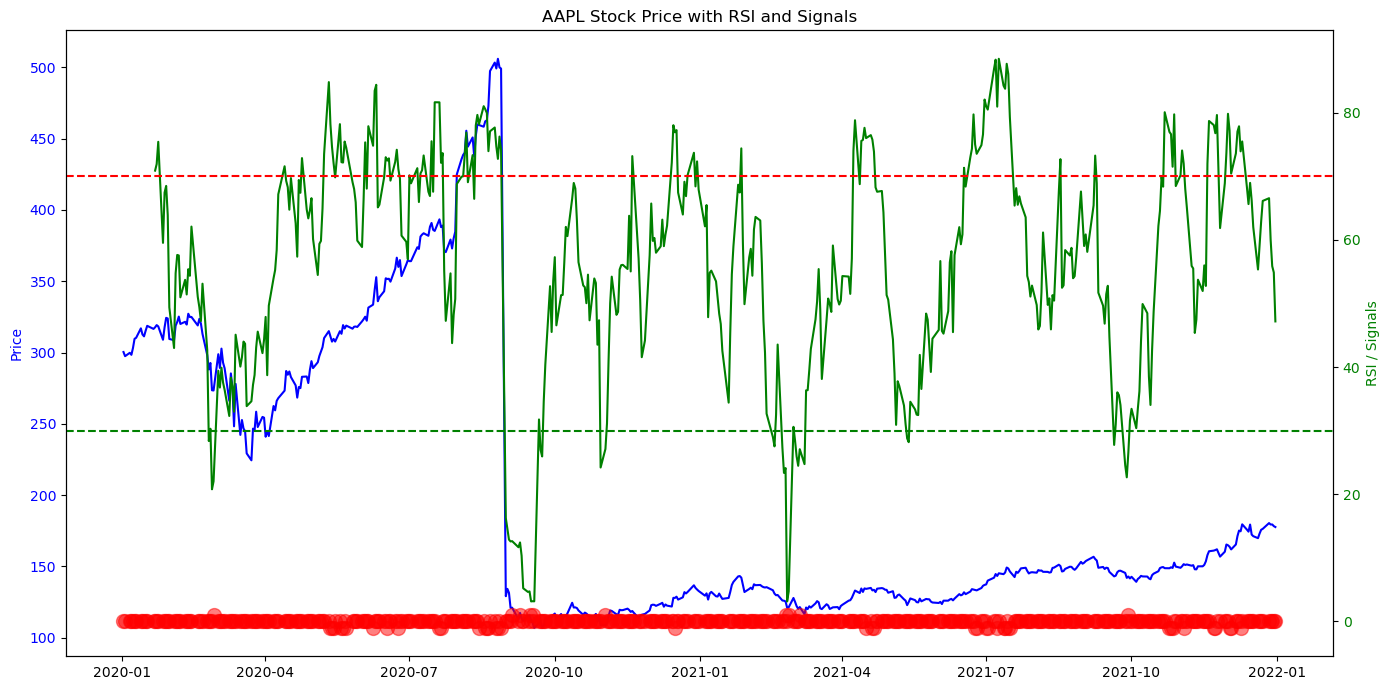

Portfolio Return: 33.71%


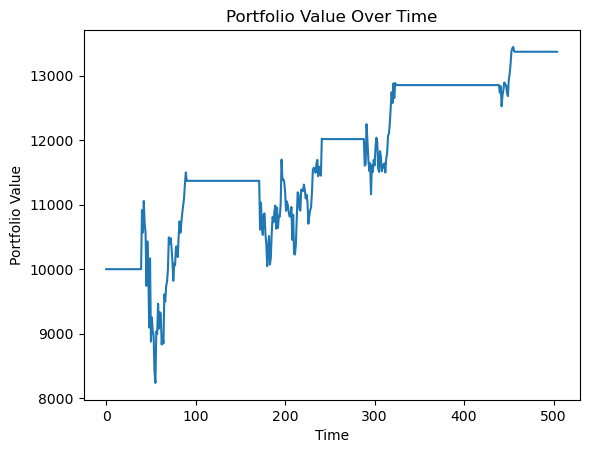

In [9]:
#Step 3 Creating model
#Example 2 with RSI

def rsi_strategy(data, period=14, oversold_threshold=30, overbought_threshold=70):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    rsi_slope = rsi.diff()
    
    #Generate buy/sell signals 
    data['RSI'] = rsi
    data['signal'] = 0
    data.loc[(rsi < oversold_threshold) & (rsi_slope > 0), 'signal'] = 1  #Buy
    data.loc[(rsi > overbought_threshold) & (rsi_slope < 0), 'signal'] = -1  #Sell
    
    return data

#Usage
processed_data = rsi_strategy(historical_data)
print(processed_data)

#Plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot AAPL Close Price and RSI
ax1.plot(processed_data['close'], label='AAPL Close Price', color='b')
ax1.set_ylabel('Price', color='b')
ax1.set_title('AAPL Stock Price with RSI and Signals')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(processed_data['signal'], marker='o', linestyle='None', markersize=10, label='Signals', color='r', alpha=0.5)
ax2.plot(processed_data['RSI'], label='RSI', color='g')
ax2.axhline(30, color='g', linestyle='--', label='Oversold Threshold')
ax2.axhline(70, color='r', linestyle='--', label='Overbought Threshold')
ax2.set_ylabel('RSI / Signals', color='g')
ax2.tick_params(axis='y', labelcolor='g')
fig.tight_layout()
plt.show()

#Step 3: Backtesting
def backtest(data):
    
    # Initialize variables
    initial_cash = 10000  # Initial cash amount
    cash = initial_cash
    shares = 0  # Initial shares
    position_value = 0  # Initial position value
    total_value = 0  # Initial total portfolio value
    portfolio_value = []  # List to store portfolio value over time

    # Iterate through each row in the processed data
    for index, row in data.iterrows():
        # Calculate position value
        position_value = shares * row['close']

        # Update total portfolio value
        total_value = cash + position_value

        # Record portfolio value
        portfolio_value.append(total_value)

        # Buy signal: If signal is 1 (buy)
        if row['signal'] == 1:
            # Calculate the number of shares to buy (assuming full investment)
            shares_to_buy = cash // row['close']
            # Update cash and shares
            cash -= shares_to_buy * row['close']
            shares += shares_to_buy

        # Sell signal: If signal is -1 (sell)
        elif row['signal'] == -1:
            # Sell all shares
            cash += shares * row['close']
            shares = 0

    # Calculate final portfolio value
    final_portfolio_value = cash + shares * data.iloc[-1]['close']

    # Calculate portfolio return
    portfolio_return = (final_portfolio_value - initial_cash) / initial_cash * 100

    return portfolio_value, portfolio_return

# Perform backtesting
portfolio_value, portfolio_return = backtest(processed_data)

# Print portfolio return
print("Portfolio Return: {:.2f}%".format(portfolio_return))

# Plot portfolio value over time
import matplotlib.pyplot as plt

plt.plot(portfolio_value)
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

#### Trading Strategy with MACD ####

                            close      high      low  trade_count     open  \
timestamp                                                                    
2020-01-02 05:00:00+00:00  300.35  300.6000  295.190       283489  296.240   
2020-01-03 05:00:00+00:00  297.43  300.5800  296.500       280441  297.150   
2020-01-06 05:00:00+00:00  299.80  299.9600  292.750       242868  293.790   
2020-01-07 05:00:00+00:00  298.39  300.9000  297.480       227871  299.840   
2020-01-08 05:00:00+00:00  303.19  304.4399  297.156       261773  297.160   
...                           ...       ...      ...          ...      ...   
2021-12-27 05:00:00+00:00  180.33  180.4200  177.070       630113  177.085   
2021-12-28 05:00:00+00:00  179.29  181.3300  178.530       631773  180.160   
2021-12-29 05:00:00+00:00  179.38  180.6300  178.140       491795  179.330   
2021-12-30 05:00:00+00:00  178.20  180.5700  178.090       498666  179.470   
2021-12-31 05:00:00+00:00  177.57  179.2300  177.260       45076

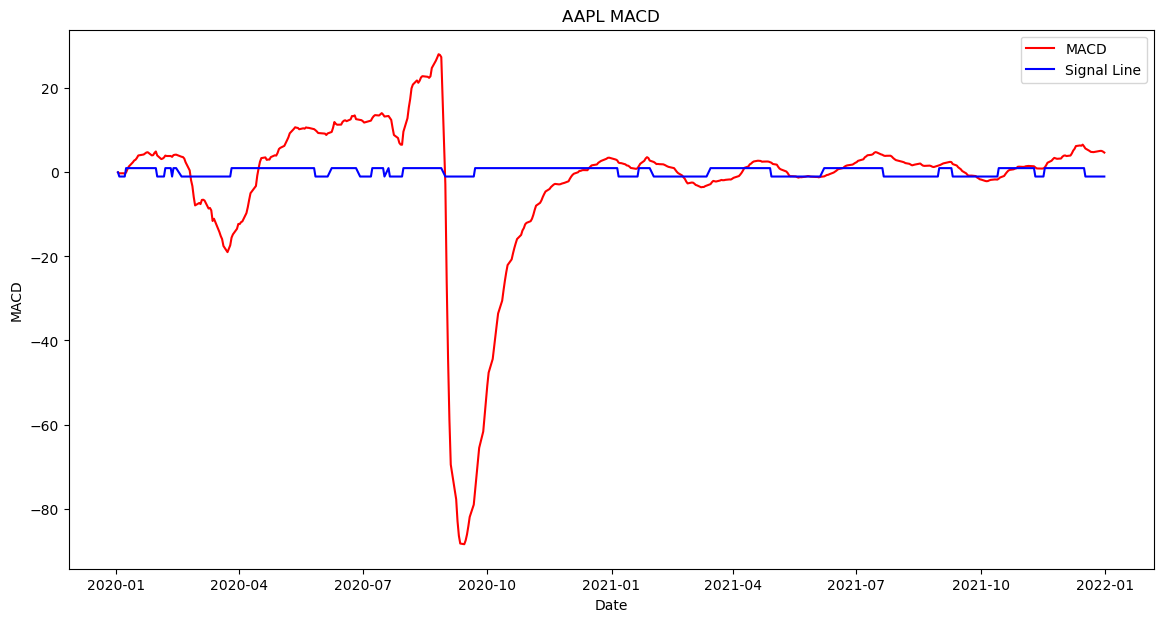

Portfolio Return: -37.32%


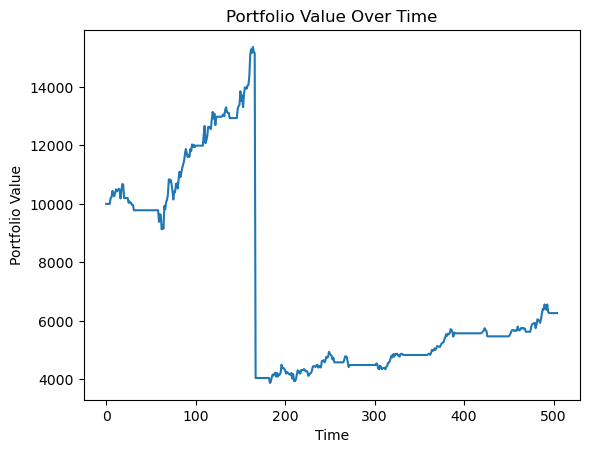

In [10]:
#Step 3 Creating model
#Example 3 with MACD

def macd_strategy(data, fast_period=12, slow_period=26, signal_period=9):
    exp1 = data['close'].ewm(span=fast_period, adjust=False).mean()
    exp2 = data['close'].ewm(span=slow_period, adjust=False).mean()
    macd = exp1 - exp2
    
    # Calculate MACD Signal line
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    
    # Generate buy/sell signals based on MACD crossovers
    data['MACD'] = macd
    data['signal'] = 0
    data.loc[macd > signal, 'signal'] = 1  #Buy
    data.loc[macd < signal, 'signal'] = -1  #Sell
    
    return data

#Usage
processed_data = macd_strategy(historical_data)
print(processed_data)

#Plot
plt.figure(figsize=(14, 7))
plt.plot(processed_data['MACD'], label='MACD', color='red')
plt.plot(processed_data['signal'], label='Signal Line', color='blue')
plt.title('AAPL MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

#Step 3: Backtesting
def backtest(data):
    
    # Initialize variables
    initial_cash = 10000  # Initial cash amount
    cash = initial_cash
    shares = 0  # Initial shares
    position_value = 0  # Initial position value
    total_value = 0  # Initial total portfolio value
    portfolio_value = []  # List to store portfolio value over time

    # Iterate through each row in the processed data
    for index, row in data.iterrows():
        # Calculate position value
        position_value = shares * row['close']

        # Update total portfolio value
        total_value = cash + position_value

        # Record portfolio value
        portfolio_value.append(total_value)

        # Buy signal: If signal is 1 (buy)
        if row['signal'] == 1:
            # Calculate the number of shares to buy (assuming full investment)
            shares_to_buy = cash // row['close']
            # Update cash and shares
            cash -= shares_to_buy * row['close']
            shares += shares_to_buy

        # Sell signal: If signal is -1 (sell)
        elif row['signal'] == -1:
            # Sell all shares
            cash += shares * row['close']
            shares = 0

    # Calculate final portfolio value
    final_portfolio_value = cash + shares * data.iloc[-1]['close']

    # Calculate portfolio return
    portfolio_return = (final_portfolio_value - initial_cash) / initial_cash * 100

    return portfolio_value, portfolio_return

# Perform backtesting
portfolio_value, portfolio_return = backtest(processed_data)

# Print portfolio return
print("Portfolio Return: {:.2f}%".format(portfolio_return))

# Plot portfolio value over time
import matplotlib.pyplot as plt

plt.plot(portfolio_value)
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

#### Sending Order to Alpaca ####

In [11]:
#Step 4 - Sending the order to Alpaca
#Paper Trading execution - causing error currently when running it though
def paper_trade(strategy_data, initial_capital=100000):
    api = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')
    api.get_account()
    
    #Track current position
    current_position = 0  # 0 for no position, 1 for long position, -1 for short position
    trades = []

    # Implement trading strategy
    for i in range(len(strategy_data)):
        if strategy_data['signal'][i] == 1.0 and current_position != 1:
            # Buy signal and no current long position
            order = api.submit_order(
                symbol='AAPL',
                qty=1,  # Adjust position size as needed
                side='buy',
                type='market',
                time_in_force='gtc'
            )
            trades.append(('buy', order.filled_at))
            current_position = 1
        elif strategy_data['signal'][i] == -1.0 and current_position != -1:
            # Sell signal and no current short position
            order = api.submit_order(
                symbol='AAPL',
                qty=1,  # Adjust position size as needed
                side='sell',
                type='market',
                time_in_force='gtc'
            )
            trades.append(('sell', order.filled_at))
            current_position = -1
    
    #Account information after trading
    account_info = api.get_account()

    #Calculate performance metrics
    total_returns = (float(account_info.portfolio_value) - initial_capital) / initial_capital
    win_rate = sum(1 for trade in trades if trade[0] == 'sell') / len(trades)

    return account_info, total_returns, win_rate, trades

#Perform paper trading
paper_trade_results, total_returns, win_rate, trades = paper_trade(processed_data)

# Print paper trading results
print("Paper Trading Results:")
print("Account Value:", paper_trade_results.portfolio_value)
print("Total Returns:", total_returns)
print("Win Rate:", win_rate)
print("Trades:", trades)

APIError: potential wash trade detected. use complex orders

### Trading Strategies and Backtesting for SPY ###

In [12]:
import pandas as pd
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [13]:
#***Step 1 - Connecting to Alpaca***

# Set your API key and secret
api_key = "PKXTC19ELFLH7AMSTHBB"
api_secret = "Zpb9uRDU5d26OZQfA2r29FRNlLeVTCB9TkVo7LpY"
base_url = 'https://paper-api.alpaca.markets'  # Use paper trading base URL for testing

# Initialize Alpaca API
api = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')

# Get historical market data
symbol_2 = 'SPY'  
timeframe_2 = '1D'
historical_spy = api.get_bars(symbol_2, timeframe_2, "2020-01-01", "2022-01-01").df
print(historical_spy)

                            close    high     low  trade_count    open  \
timestamp                                                                
2020-01-02 05:00:00+00:00  324.87  324.89  322.53       304886  323.54   
2020-01-03 05:00:00+00:00  322.43  323.64  321.10       358026  321.16   
2020-01-06 05:00:00+00:00  323.73  323.73  320.36       255769  320.49   
2020-01-07 05:00:00+00:00  322.74  323.54  322.24       226060  323.02   
2020-01-08 05:00:00+00:00  324.42  325.78  322.67       340005  322.94   
...                           ...     ...     ...          ...     ...   
2021-12-27 05:00:00+00:00  477.26  477.31  472.01       380201  472.06   
2021-12-28 05:00:00+00:00  476.87  478.81  476.06       372335  477.72   
2021-12-29 05:00:00+00:00  477.48  478.56  475.92       345719  476.98   
2021-12-30 05:00:00+00:00  476.16  479.00  475.67       353570  477.93   
2021-12-31 05:00:00+00:00  474.96  476.86  474.67       435087  475.64   

                             volume  

In [14]:
# Get account details
account_spy = api.get_account()
print("SPY Account Details:")
print(account_spy)

SPY Account Details:
Account({   'account_blocked': False,
    'account_number': 'PA3DUQFGIAIG',
    'accrued_fees': '0',
    'admin_configurations': {},
    'balance_asof': '2024-10-14',
    'bod_dtbp': '0',
    'buying_power': '78458.96',
    'cash': '-67040.39',
    'created_at': '2024-05-03T23:30:01.861042Z',
    'crypto_status': 'ACTIVE',
    'crypto_tier': 1,
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '0',
    'effective_buying_power': '78458.96',
    'equity': '145499.35',
    'id': '03d86d11-874e-49ed-aed0-18d018a71fb6',
    'initial_margin': '106269.87',
    'intraday_adjustments': '0',
    'last_equity': '143247.73',
    'last_maintenance_margin': '104442.88',
    'long_market_value': '212539.74',
    'maintenance_margin': '63761.92',
    'multiplier': '2',
    'non_marginable_buying_power': '37229.48',
    'options_approved_level': 2,
    'options_buying_power': '81737.42',
    'options_trading_level': 2,
    'pattern_day_trader': False,
 

In [15]:
#*** Step-2 Save historical data as CSV***

# Save historical data to CSV file
csv_file_path_1 = 'historical_spy.csv'
historical_spy.to_csv(csv_file_path_1)

print(f"Saved historical data to {csv_file_path_1}")

Saved historical data to historical_spy.csv


**Historical data cleaning**

In [16]:
#***Step-3 Cleaning the historical data***

#Import historical data from csv
spy = pd.read_csv('historical_spy.csv')
print(spy.head())

# Check for missing values
print("\nMissing Values:")
print(spy.isnull().sum())

# Handle missing values (example: fill missing values with 0)
spy = spy.fillna(0)

# Check for duplicates
print("\nDuplicates:")
print(spy.duplicated().sum())

# Remove duplicates
spy = spy.drop_duplicates()


                   timestamp   close    high     low  trade_count    open  \
0  2020-01-02 05:00:00+00:00  324.87  324.89  322.53       304886  323.54   
1  2020-01-03 05:00:00+00:00  322.43  323.64  321.10       358026  321.16   
2  2020-01-06 05:00:00+00:00  323.73  323.73  320.36       255769  320.49   
3  2020-01-07 05:00:00+00:00  322.74  323.54  322.24       226060  323.02   
4  2020-01-08 05:00:00+00:00  324.42  325.78  322.67       340005  322.94   

     volume        vwap  
0  60187033  323.680084  
1  80319689  322.732865  
2  56672077  322.602237  
3  43646563  322.918261  
4  69691471  324.553163  

Missing Values:
timestamp      0
close          0
high           0
low            0
trade_count    0
open           0
volume         0
vwap           0
dtype: int64

Duplicates:
0


The missing values are dealt and the duplicates are managed as well

#### Trading Strategy with Moving Average ####

In [17]:
#***Step-4 Creating model***
#Example - 1 Trading stratgey with moving average

def moving_average_strategy1(data, short_window = 10, long_window = 20):

    # Calculate short and long moving averages
    data['Short_MA'] = data['close'].rolling(window = short_window).mean()
    data['Long_MA'] = data['close'].rolling(window = long_window).mean()

    # Generate buy/sell signals
    data['Signal'] = 0  # Initialize all signals as hold

    # Set buy signals where short MA crosses above long MA
    data.loc[data['Short_MA'] > data['Long_MA'], 'Signal'] = 1

    # Set sell signals where short MA crosses below long MA
    data.loc[data['Short_MA'] < data['Long_MA'], 'Signal'] = -1

    return data

strategy_data = moving_average_strategy1(spy)

def backtest_strategy1(data, strategy_function):
    
    # Apply trading strategy to historical data
    signals = strategy_function(data)

    # Simulate trading
    portfolio_value = 100000  
    positions = {}
    
    for index, row in signals.iterrows():
        # Execute buy orders
        if row['Signal'] == 1:
            
            position_size = portfolio_value * 0.1  # Example: allocate 10% of portfolio to each trade
            num_shares = int(position_size / data.loc[index, 'close'])
            portfolio_value -= num_shares * data.loc[index, 'close']
            positions[index] = num_shares
        
        # Execute sell orders
        elif row['Signal'] == -1:           
            if index in positions:
                portfolio_value += positions[index] * data.loc[index, 'close']
                # Remove position
                del positions[index]

    # Calculate performance metrics
    # Calculate final portfolio value
    final_portfolio_value = portfolio_value  
    for num_shares in positions.values():
        closing_price = data['close'].iloc[-1]  
        position_value = num_shares * closing_price
        final_portfolio_value += position_value
        
    returns = ((final_portfolio_value - 100000) / 100000) *100 # Example: calculate returns as a percentage
    performance_metrics = returns

    return performance_metrics

#Applying Backtesting
performance_metrics = backtest_strategy1(spy, moving_average_strategy1)
print("Portfolio Return: {:.2f}%".format(performance_metrics))

Portfolio Return: 48.60%


**Plotting the SPY close Price and Returns**

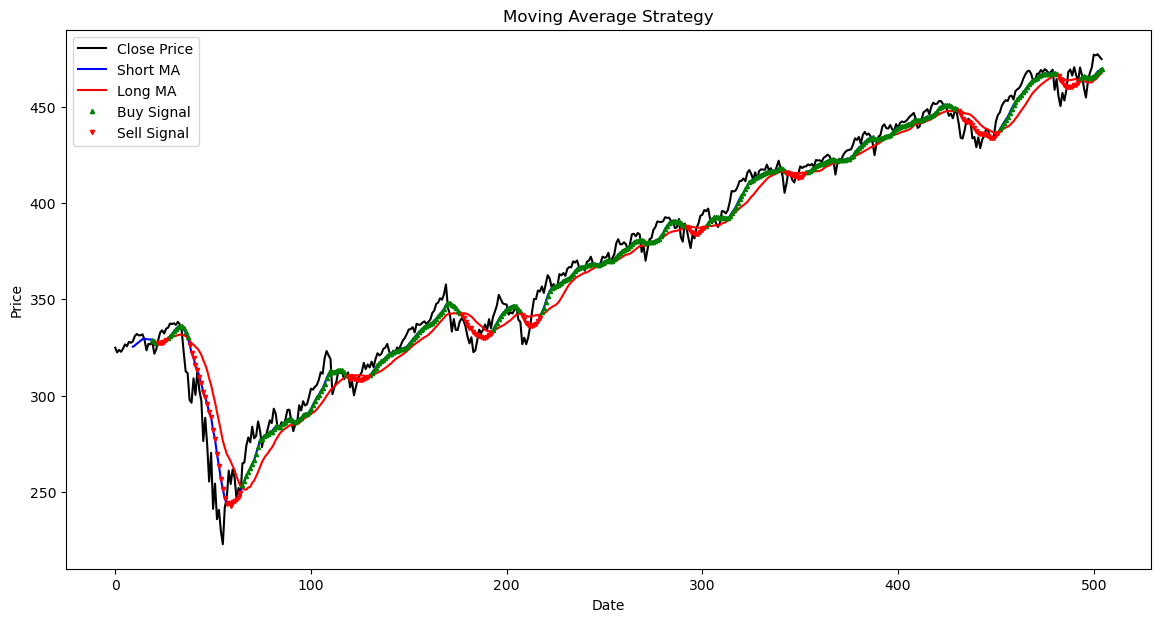

In [18]:
# Plotting
plt.figure(figsize=(14, 7))

# Plot close price
plt.plot(spy.index, spy['close'], label='Close Price', color='black')

# Plot moving averages
plt.plot(spy.index, spy['Short_MA'], label='Short MA', color='blue')
plt.plot(spy.index, spy['Long_MA'], label='Long MA', color='red')

# Plot buy signals
plt.plot(spy[spy['Signal'] == 1].index, spy['Short_MA'][spy['Signal'] == 1], '^', markersize=3, color='g', lw=0, label='Buy Signal')

# Plot sell signals
plt.plot(spy[spy['Signal'] == -1].index, spy['Short_MA'][spy['Signal'] == -1], 'v', markersize=3, color='r', lw=0, label='Sell Signal')

plt.title('Moving Average Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Trading Strategy with RSI ####

In [19]:
#Example - 2 Trading stratgey with RSI

#Defining function to calculate RSI
def calculate_rsi1(data, window = 14, overbought_threshold=70, oversold_threshold=30):
    delta = data['close'].diff()
    
    #Calculating gain
    gain = (delta.where(delta > 0, 0)).fillna(0)
    
    #Calculating loss
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    
    avg_gain = gain.rolling(window = window, min_periods = window).mean()
    avg_loss = loss.rolling(window = window, min_periods = window).mean()
    
    #Implementing rsi logic
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi

    # Initialize signals column as hold (0)
    data['Signal'] = 0

    # Generate buy signals (RSI below oversold threshold)
    data.loc[data['RSI'] < oversold_threshold, 'Signal'] = 1

    # Generate sell signals (RSI above overbought threshold)
    data.loc[data['RSI'] > overbought_threshold, 'Signal'] = -1

    return data

#Applying for historical data
strategy_data = calculate_rsi1(spy)

#Applying Backtesting for RSI strategy
performance_metrics = backtest_strategy1(spy, calculate_rsi1)
print("Portfolio Return with RSI strategy: {:.2f}%".format(performance_metrics))

Portfolio Return with RSI strategy: 52.01%


**Plotting the SPY close Price and Buy-Sell signals**

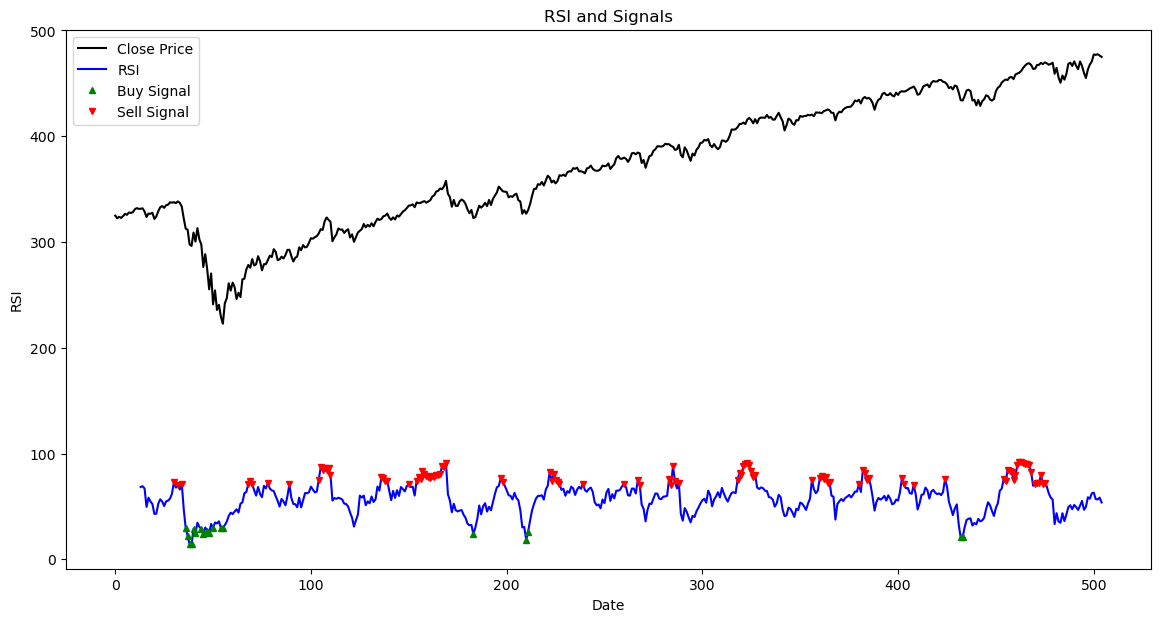

In [20]:
# Plotting RSI and signals
plt.figure(figsize=(14, 7))

# Plot close price
plt.plot(spy.index, spy['close'], label='Close Price', color='black')

# Plot RSI
plt.plot(spy.index, spy['RSI'], label='RSI', color='blue')

# Plot buy signals
plt.plot(spy[spy['Signal'] == 1].index, spy['RSI'][spy['Signal'] == 1], '^', markersize=5, color='g', lw=0, label='Buy Signal')

# Plot sell signals
plt.plot(spy[spy['Signal'] == -1].index, spy['RSI'][spy['Signal'] == -1], 'v', markersize=5, color='r', lw=0, label='Sell Signal')

# Add labels and legend
plt.title('RSI and Signals')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

# Show plot
plt.show()

#### Trading Strategy with MACD ####

In [21]:
#Example - 3 Trading stratgey with MACD

def calculate_MACD1(data, short_term = 12, long_term  =26, signal_term = 9):
    # Calculate the Exponential Moving Averages for MACD
    data['EMA_short'] = data['close'].ewm(span = short_term, adjust = False).mean()
    data['EMA_long'] = data['close'].ewm(span = long_term, adjust = False).mean()
    
    # Calculate the MACD and Signal Line
    data['MACD'] = data['EMA_short'] - data['EMA_long']
    data['Signal_Line'] = data['MACD'].ewm(span = signal_term, adjust=False).mean()
    
    # Determine MACD signals
    data['Signal'] = 0  
    data.loc[data['MACD'] > data['Signal_Line'], 'Signal'] = 1
    data.loc[data['MACD'] < data['Signal_Line'], 'Signal'] = -1
       
    return data

#Applying for historical data
strategy_data = calculate_MACD1(spy)

#Applying Backtesting for MACD strategy
performance_metrics = backtest_strategy1(spy, calculate_MACD1)
print("Portfolio Return with MACD strategy: {:.2f}%".format(performance_metrics))

Portfolio Return with MACD strategy: 45.59%


**Plotting the SPY close Price and Buy-Sell signals with MACD**

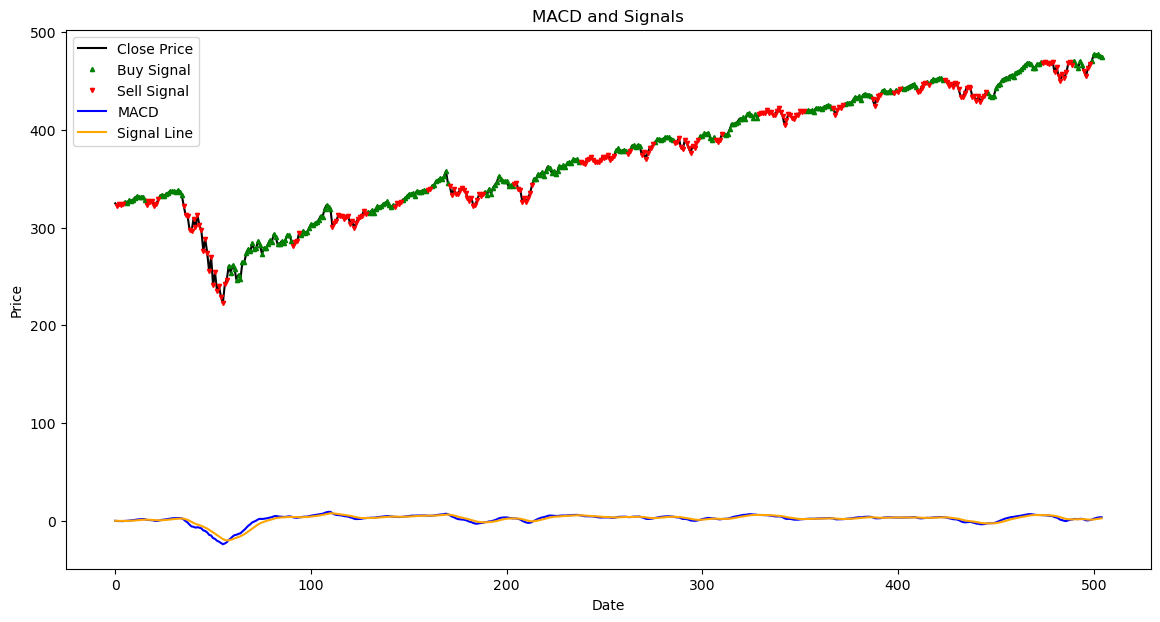

In [22]:
# Plotting close price, MACD, signal line, and signals
plt.figure(figsize=(14, 7))

# Plot close price
plt.plot(spy.index, spy['close'], label='Close Price', color='black')

# Plot buy signals
plt.plot(spy[spy['Signal'] == 1].index, spy['close'][spy['Signal'] == 1], '^', markersize=3, color='g', lw=0, label='Buy Signal')

# Plot sell signals
plt.plot(spy[spy['Signal'] == -1].index, spy['close'][spy['Signal'] == -1], 'v', markersize=3, color='r', lw=0, label='Sell Signal')

# Plot MACD and signal line
plt.plot(spy.index, spy['MACD'], label='MACD', color='blue')
plt.plot(spy.index, spy['Signal_Line'], label='Signal Line', color='orange')

# Add labels and legend
plt.title('MACD and Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show plot
plt.show()

#### Sending order to Alpaca ####

In [23]:
# Getting wash trade error
import alpaca_trade_api as tradeapi
import time

# Set your Alpaca API key and secret
api_key = 'PKXTC19ELFLH7AMSTHBB'
api_secret = 'Zpb9uRDU5d26OZQfA2r29FRNlLeVTCB9TkVo7LpY'
base_url = 'https://paper-api.alpaca.markets'

def paper_trade1(data, initial_capital=100000):
    api = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')
    api.get_account()
    
    signals = moving_average_strategy1(spy)
    
    # Specify the asset symbol and trading interval
    symbol = 'SPY'  # Replace with your desired stock symbol
    interval = 5  # Time interval in seconds


    # Place orders based on the signals
    for index, row in signals.iterrows():
    
        #last_close_price = row['close'].iloc[-1]
    
        if row['Signal'] == 1:
            # Place a buy order
            api.submit_order(
                symbol = symbol,          
                qty    = 1,                 
                side   = 'buy',             
                type   = 'market',          
                time_in_force = 'gtc',
                #limit_price = last_close_price * 1.01,
            )
            print("Buy order placed at index:", index)
        
        elif row['Signal'] == -1:
            # Place a sell order
            api.submit_order(
                symbol = symbol,  
                qty    = 1,         
                side   = 'sell',    
                type   = 'market',  
                time_in_force = 'gtc',
                #limit_price = last_close_price * 0.99,
                #order_class   = 'simple',               
                #stop_loss     = dict(stop_price = 340.01)
            )
            print("Sell order placed at index:", index)
            
    
    #Calculate performance metrics
    total_returns = (float(account_info.portfolio_value) - initial_capital) / initial_capital
    
    return total_returns

#Perform paper trading
total_returns = paper_trade1(strategy_data)


Buy order placed at index: 19
Buy order placed at index: 20
Buy order placed at index: 21


APIError: potential wash trade detected. use complex orders